In [1]:
import ThesisFunctions
from ThesisFunctions import *
import importlib
from scipy.optimize import approx_fprime


In [2]:
importlib.reload(ThesisFunctions)

<module 'ThesisFunctions' from '/Users/amineroudani/Documents/Thesis/ThesisFunctions.py'>

In [3]:
# Using GROEBNER BASIS to find number of minimas (
# Simple case: 4 datapoint with small noise



# Define the symbolic variables
x0, b = sp.symbols('x0 b')

# Datapoints must be rational for Groebner function to work
x_i = [1, 2, sp.Rational(401, 100), 7]  # Data
t_i = [0, 1, 2, 3]  # Time

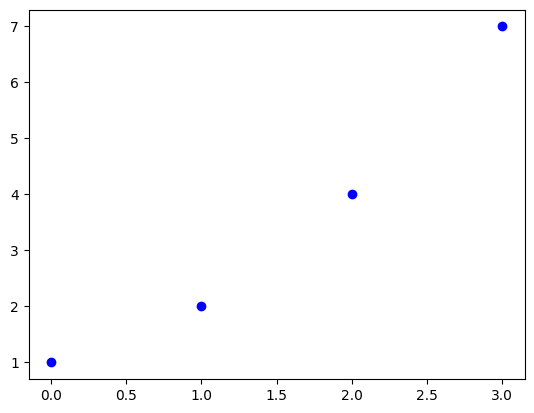

In [4]:
plt.scatter(t_i, x_i, color='blue', label='Data Points')

In [5]:

# Construct the SSE polynomial
SSE_poly = sum([(x - x0 * b**t)**2 for x, t in zip(x_i, t_i)])

#print(SSE_poly)

# Compute the partial derivatives with respect to x0 and beta
partial_x0 = sp.diff(SSE_poly, x0)
partial_b = sp.diff(SSE_poly, b)

#print(" ")
#print("Partials:")
#print(partial_x0)
#print(partial_b)
#print(" ")

# Compute the Groebner basis for the system of equations given by the partial derivatives
B = sp.groebner([partial_x0, partial_b], x0, b, order='lex')
# The result 'B' is a Groebner basis for the ideal generated by partial_x0 and partial_beta
print("Groebner Basis:")
print(" ")
for poly in B:
    print(poly, "\n")

Groebner Basis:
 
467238928137046807*b**9/405729935206888804 + 32115904073191902801*b**8/40572993520688880400 - 38296315328474803*b**7/405729935206888804 - 981674101477441197*b**6/405729935206888804 - 2156093110563984219*b**5/405729935206888804 - 679318271110671250*b**4/101432483801722201 - 2345916464134390119*b**3/202864967603444402 - 62825886243479167601*b**2/10143248380172220100 - 285640938032542152*b/101432483801722201 + x0 - 115638180184737201/101432483801722201 

b**10 - 49199*b**9/280700 + 1699*b**8/2807 - 7396*b**7/2807 - 5919*b**6/2807 - 1760601*b**5/280700 - 14937*b**4/2807 - 61543*b**3/20050 - 4306*b**2/2807 - 1102*b/2807 - 200/2807 



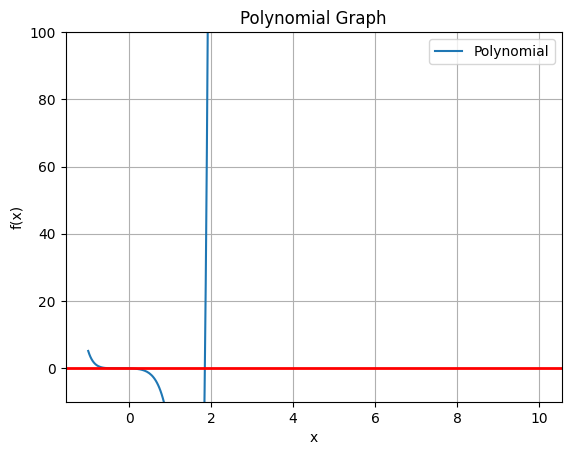

In [90]:
#Checking the number of positive roots (Graphically )

# Define your polynomial function
def poly_func(b):
    return b**10 - 49199*b**9/280700 + 1699*b**8/2807 - 7396*b**7/2807 - 5919*b**6/2807 - 1760601*b**5/280700 - 14937*b**4/2807 - 61543*b**3/20050 - 4306*b**2/2807 - 1102*b/2807 - 200/2807 


# Generate x values
x_values = np.linspace(-1, 10, 400)  # Adjust range and density as needed
y_values = poly_func(x_values)

# Plotting
plt.plot(x_values, y_values, label='Polynomial')
plt.axhline(0, color='red', lw=2)  # X-axis
plt.legend()
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Polynomial Graph')
plt.ylim(-10, 100)
plt.show()

In [91]:
#Checking Number of Positive roots NUMBERICALLY using sympy

x = symbols('x')
# Define your polynomial
polynomial = poly_func(x)

# Solve polynomial
roots = solve(polynomial, x)

# Filter positive roots
positive_roots_symbolic = [root.evalf() for root in roots if root.is_real and root > 0]

print(f"Symbolically found positive roots: {positive_roots_symbolic}")


Symbolically found positive roots: [1.84598025888549]


In [7]:
def groeb(x_i, t_i):
    x0, b = sp.symbols('x0 b')
    SSE_poly = sum([(x - x0 * b**t)**2 for x, t in zip(x_i, t_i)])
    # Compute the partial derivatives with respect to x0 and bet
    partial_x0 = sp.diff(SSE_poly, x0)
    partial_b = sp.diff(SSE_poly, b)
    # Compute the Groebner basis for the system of equations given by the partial derivatives
    B = sp.groebner([partial_x0, partial_b], x0, b, order='lex')
    return B

Saved
Roots found Symbolically: [0.544300510039737, 0.117323234134973, 3.60532161524728]
Number of positive roots: 3


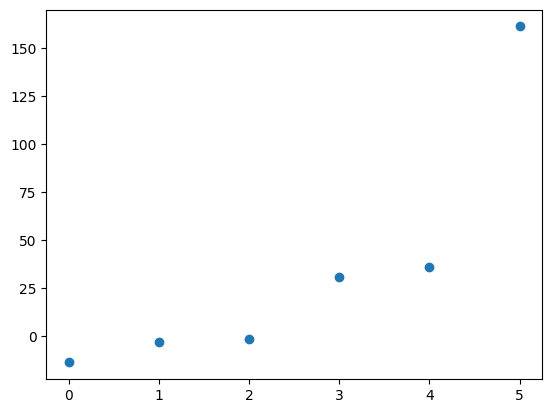

In [134]:
# Looking at the landscape of a multi-minimum case
num_data_points = 6
alpha = 1
x0 = 1
noise_level =  10

#Generate Data
data = data_gen(num_data_points, noise_level, alpha, x0)

#Basic Data processing
x_i = list(data['Data'].values)
t_i = list(data['Time'].values)

#Plot data
plt.scatter(t_i, x_i)

#Compute Groebner Basis
B = groeb(x_i, t_i)

#Find roots symbolically
roots_symb = roots_symbolic(B[1])
print(f'Roots found Symbolically: {roots_symb}')

#Find number of roots schrum method:
num_positive_roots = count_positive_roots(B[1])
print(f'Number of positive roots: {num_positive_roots}')

In [135]:
l = find_x0_alpha_pairs(B, roots_symb)

print(l)

[(4.44089209850063e-16, -0.608253776486134), (-13.8757421672478, -2.14282246846992), (0.263111553620547, 1.28241098041844)]


In [138]:


(x0_1, alpha_1) = l[0]
(x0_2, alpha_2) = l[1]
(x0_3, alpha_3) = l[2]

val1 = []
val2 = []
val3 = []
for t in t_i:
    val1.append(x0_1 * np.exp(float(alpha_1 * t)))
    val2.append(x0_2 * np.exp(float(alpha_2 * t)))
    val3.append(x0_3 * np.exp(float(alpha_3 * t)))


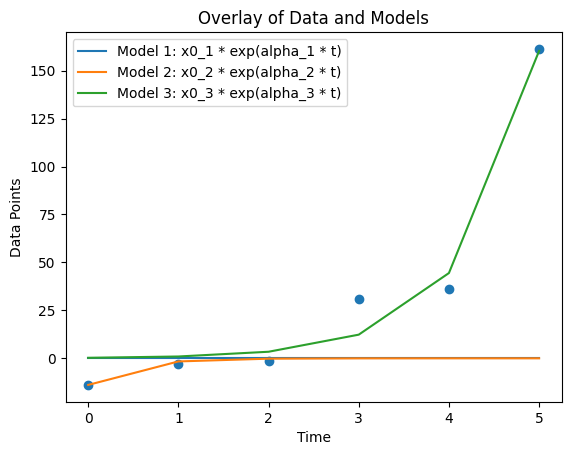

In [139]:
plt.scatter(t_i, x_i)

# Parameters for the first pair (x0_1, alpha_1)


plt.plot(t_i, val1 , label='Model 1: x0_1 * exp(alpha_1 * t)')
plt.plot(t_i, val2, label='Model 2: x0_2 * exp(alpha_2 * t)')
plt.plot(t_i, val3, label='Model 3: x0_3 * exp(alpha_3 * t)')


# Labels and legend
plt.xlabel('Time')
plt.ylabel('Data Points')
plt.title('Overlay of Data and Models')
plt.legend()

In [141]:
print(p1,p2,p3)

(4.44089209850063e-16, -0.608253776486134) (-13.8757421672478, -2.14282246846992) (0.263111553620547, 1.28241098041844)


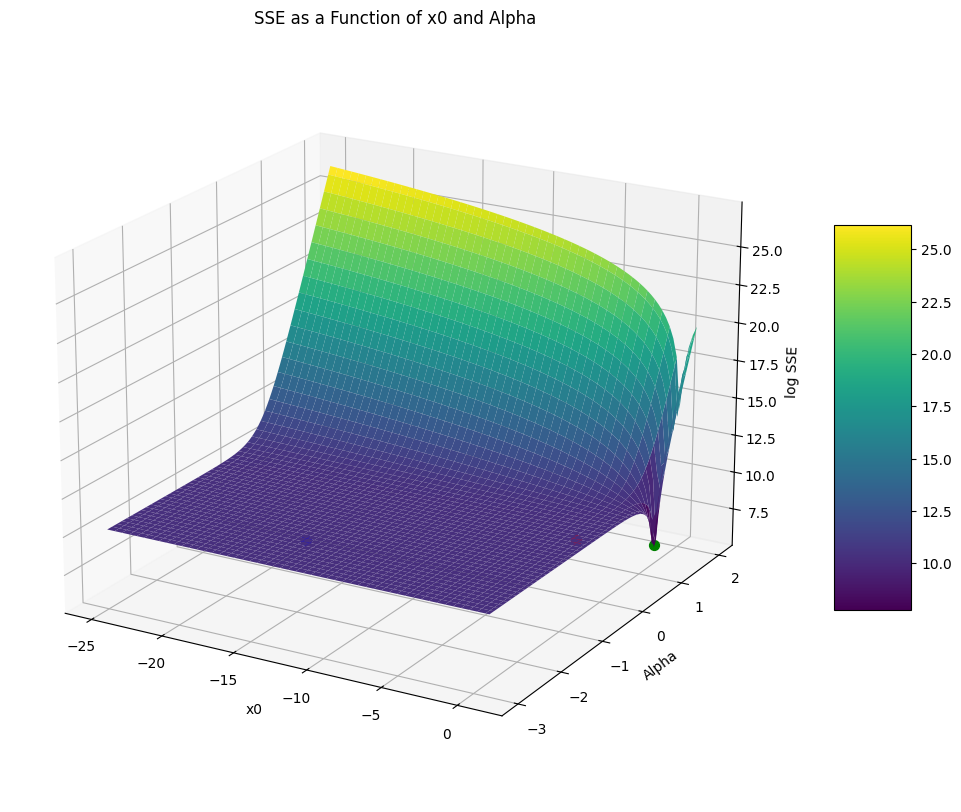

In [140]:
data = pd.DataFrame({'Time': t_i, 'Data': x_i})
# Plotting the SSE/Error as a function of x0 and alpha, with the data fixed. 
# This gives a visualization of minimas...


# Define the range for alpha and x0
alpha_range = np.linspace(-3, 2, 100)  # Adjust the range as needed
x0_range = np.linspace(-25, 1, 100)  # Adjust the range as needed


# Generate a meshgrid for x0 and alpha ranges
X0, Alpha = np.meshgrid(x0_range, alpha_range)


# Initialize an array to store SSE values
SSE_values = np.zeros(X0.shape)


# Compute SSE for each combination of x0 and alpha
for i in range(len(alpha_range)):
    for j in range(len(x0_range)):
        params = (X0[i, j], Alpha[i, j])
        SSE_values[i, j] = sse(params, data)

        
# Creating the plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')


# Surface plot with log scale (since data is exponential)
surf = ax.plot_surface(X0, Alpha, np.log(SSE_values), cmap='viridis', edgecolor='none')


# Labels and title
ax.set_xlabel('x0')
ax.set_ylabel('Alpha')
ax.set_zlabel('log SSE')
ax.set_title('SSE as a Function of x0 and Alpha')


p1 = (x0_1, alpha_1)
p2 = (x0_2, alpha_2)
p3 = (x0_3, alpha_3)


# Corrected Points to include the SSE values for proper 3D plotting
# Calculate the SSE for each point or get it from your previous calculations
p1_sse = np.log(float(sse(p1, data)) + 1)
p2_sse = np.log(float(sse(p2, data)) + 1)
p3_sse = np.log(float(sse(p3, data)) + 1)

# Plot points on the surface. Z value needs to be the logged SSE for each point
ax.scatter(p1[0], p1[1], p1_sse, color='red', s=50, label='Point 1')  # s is the size of the point
ax.scatter(p2[0], p2[1], p2_sse, color='blue', s=50, label='Point 2')
ax.scatter(p3[0], p3[1], p3_sse, color='green', s=50, label='Point 3')


# Colorbar to show the SSE scale better/clearer
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.view_init(elev=20, azim=-60)

# Show the plot with the adjusted view
plt.show()


In [74]:
tT = t_i
X = x_i

In [ ]:
t_i = np.array(T)  #  time data
x_i = np.array(X)  #  observation data

In [90]:
def sse2(params):
    """Sum of Squared Errors (SSE) function."""
    x0, alpha = params
    predictions = model(t_i, x0, alpha)
    return np.sum((x_i - predictions) ** 2)

def hessian_numerical(params):
    """Numerically compute the Hessian matrix at the given parameters."""
    epsilon = np.sqrt(np.finfo(float).eps)
    # Helper function to compute gradient at a point
    def gradient_func(params):
        return approx_fprime(params, sse2, epsilon)
    
    # Compute the gradient around the params for each parameter in turn
    hessian = np.zeros((2, 2))
    for i in range(len(params)):
        # Temporary function to compute gradient around the ith parameter
        def partial_gradient(p):
            params_with_variation = params.copy()
            params_with_variation[i] = p
            return gradient_func(params_with_variation)[i]
        
        # Compute the second derivative (diagonal of the Hessian) numerically
        hessian[i, i] = approx_fprime([params[i]], partial_gradient, epsilon)[0]
        
    # Since the off-diagonal elements represent mixed partial derivatives and
    # our model's SSE surface is symmetric w.r.t x0 and alpha, we can use the same approach for off-diagonal
    # But for simplicity and the nature of most models, these might not need explicit calculation
    
    return hessian

# Example candidate pair (x0, alpha)




In [97]:
# ------- NOISER CASE ------- 
# Looking at the landscape of a multi-minimum case


num_data_points = 6
alpha = 1
x0 = 1
noise_level =  10

ret = { 1 : 0,
        2 : 0,
        3 : 0,
      }

for i in range(100):
    data = data_gen(num_data_points, noise_level, alpha, x0)

    #Basic Data processing
    x_i = list(data['Data'].values)
    t_i = list(data['Time'].values)

    #Plot data
    #plt.scatter(t_i, x_i)

    #Compute Groebner Basis
    B = groeb(x_i, t_i)

    #Find roots symbolically
    roots_symb = roots_symbolic(B[1])
    #print(f'Roots found Symbolically: {roots_symb}')

    #Find number of roots schrum method:
    #num_positive_roots = count_positive_roots(B[1])
    #print(f'Number of positive roots: {num_positive_roots}')
    candidates = find_x0_alpha_pairs(B, roots_symb)
    number_of_mins = 0
    for pair in candidates:
        #print(pair)
        H = hessian_numerical(np.array(pair))
        eigenvalues = np.linalg.eigvals(H)
        if np.all(eigenvalues > 0):
            number_of_mins += 1
    ret[number_of_mins] += 1        
print(ret)

{1: 94, 2: 6, 3: 0}


In [ ]:
l = find_x0_alpha_pairs(B, roots_symb)

(x0_1, alpha_1) = l[0]
(x0_2, alpha_2) = l[1]
(x0_3, alpha_3) = l[2]

val1 = []
val2 = []
val3 = []
for t in t_i:
    val1.append(x0_1 * np.exp(float(alpha_1 * t)))
    val2.append(x0_2 * np.exp(float(alpha_2 * t)))
    val3.append(x0_3 * np.exp(float(alpha_3 * t)))

print(l)

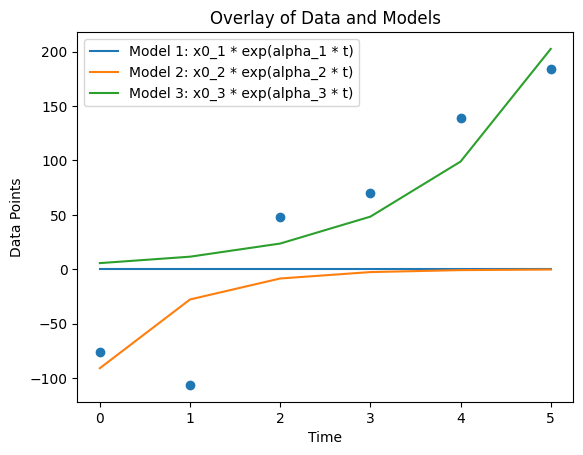

In [152]:
plt.scatter(t_i, x_i)

# Parameters for the first pair (x0_1, alpha_1)


plt.plot(t_i, val1 , label='Model 1: x0_1 * exp(alpha_1 * t)')
plt.plot(t_i, val2, label='Model 2: x0_2 * exp(alpha_2 * t)')
plt.plot(t_i, val3, label='Model 3: x0_3 * exp(alpha_3 * t)')


# Labels and legend
plt.xlabel('Time')
plt.ylabel('Data Points')
plt.title('Overlay of Data and Models')
plt.legend()

In [153]:
# Example candidate pair (x0, alpha)
candidate_pairs = [(x0_1, alpha_1), (x0_2, alpha_2), (x0_3, alpha_3)]

# Calculate and evaluate the Hessian at each candidate pair
for pair in candidate_pairs:
    H = hessian_numerical(np.array(pair))
    eigenvalues = np.linalg.eigvals(H)
    print(f"Hessian at {pair}:", H)
    print(f"Eigenvalues: {eigenvalues}")
    if np.all(eigenvalues > 0):
        print("This is a local minimum.")
    elif np.all(eigenvalues < 0):
        print("This is a local maximum.")
    else:
        print("This is a saddle point.")

Hessian at (-9.94759830064140e-14, -0.263407085247972): [[-65536.      0.]
 [     0.      0.]]
Eigenvalues: [-65536.      0.]
This is a saddle point.
Hessian at (-90.9589456124004, -1.18665630589789): [[-131072.       0.]
 [      0.   65536.]]
Eigenvalues: [-131072.   65536.]
This is a saddle point.
Hessian at (5.64342288859189, 0.716032700177717): [[  16384.       0.]
 [      0. 2457600.]]
Eigenvalues: [  16384. 2457600.]
This is a local minimum.


In [76]:
#Trying with more datapoints and NUMERICAL method to compute roots.


num_data_points = 6
alpha = 1
x0 = 1
noise_level =  10


dps = [10]
for i in range(100):
    #Generate Data
    data = data_gen(num_dp, noise_level, alpha, x0)
    print('data generated')    
    
    #Basic Data processing
    x_i = list(data['Data'].values)
    t_i = list(data['Time'].values)
    
    #Compute Groebner Basis
    B = groeb(x_i, t_i)
    print('groebner complete')    
    #Find roots symbolically
    roots_num = roots_symbolic(B[1])
    print(f'Roots found Symb: {roots_num}')
    
    #Find number of roots schrum method:
    #num_positive_roots = count_positive_roots(B[1])
    #print(f'Number of positive roots: {num_positive_roots}')
    
    candidate_pairs = find_x0_alpha_pairs(B, roots_num)
    

    # Calculate and evaluate the Hessian at each candidate pair
    print(" ")
    for pair in candidate_pairs:
        H = hessian_numerical(np.array(pair))
        eigenvalues = np.linalg.eigvals(H)
        print(f"Hessian at {pair}:", H)
        print(f"Eigenvalues: {eigenvalues}")
        if np.all(eigenvalues > 0):
            print("This is a local minimum.")
        elif np.all(eigenvalues < 0):
            print("This is a local maximum.")
        else:
            print("This is a saddle point.")
    print(" ")
    print('-------------------------')

NameError: name 'num_dp' is not defined

In [177]:
#Trying with more datapoints and NUMERICAL method to compute roots.


num_data_points = 6
alpha = 1
x0 = 1
noise_level =  60


#dps = [10, 15, 30, 40, 60, 100, 200]
#dps = [10, 15, 30]
dps = [30]

for num_dp in dps:
    #Generate Data
    data = data_gen(num_dp, noise_level, alpha, x0)
    print('data generated')    
    
    #Basic Data processing
    x_i = list(data['Data'].values)
    t_i = list(data['Time'].values)
    
    #Compute Groebner Basis
    B = groeb(x_i, t_i)
    print('groebner complete')    
    #Find roots symbolically
    roots_num = roots_numerical(B[1])
    pos_roots_num = [root for root in roots_num if root>0 ]
    print(f'Roots found Numerical: {pos_roots_num}')
    
    #Find number of roots schrum method:
    #num_positive_roots = count_positive_roots(B[1])
    #print(f'Number of positive roots: {num_positive_roots}')
    
    candidate_pairs = find_x0_alpha_pairs(B, roots_num)
    

    # Calculate and evaluate the Hessian at each candidate pair
    print(" ")
    for pair in candidate_pairs:
        H = hessian_numerical(np.array(pair))
        eigenvalues = np.linalg.eigvals(H)
        print(f"Hessian at {pair}:", H)
        print(f"Eigenvalues: {eigenvalues}")
        if np.all(eigenvalues > 0):
            print("This is a local minimum.")
        elif np.all(eigenvalues < 0):
            print("This is a local maximum.")
        else:
            print("This is a saddle point.")
    print(" ")
    print('-------------------------')

Saved
data generated
groebner complete


/opt/homebrew/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The number of calls to function has reached maxfev = 400.
  warnings.warn(msg, RuntimeWarning)


Roots found Numerical: [1.0456538871608123, 1.0465863895667813, 1.0775700543221334, 1.1247749954808253, 1.173456814341657, 1.221740225580938, 1.2694174318670939, 1.3165460835412017, 1.363220647600787, 1.4095274977540762, 1.455537287537505, 1.5013058783244104, 1.5468770104638736, 1.5922849507762782, 1.6375566880034254, 1.6827136470199127, 1.7277729893954408, 1.7727485937786172, 1.8176517900524156, 1.862491914032911, 1.9072767263170631, 1.952012731587612, 1.9967054254662133, 2.041359484002899, 2.0859789139366054, 2.13056716915851, 2.175127245446406, 2.2196617543660198, 2.2641729850863306, 2.308662952604192, 2.353133439241949, 2.3975860276636243, 2.4420221281724204, 2.486443002934969, 2.5308497843080633, 2.5752434924379095, 2.6196250481132997, 2.6639952857911267, 2.7083549627042087, 2.7527047685775377, 2.797045332704726, 2.841377230931269, 2.885700990228263, 2.930017095390729, 2.9743259923064658, 3.0186280923422, 3.062923774610864, 3.107213390658865, 3.151497265994748, 3.1957757030154035,

TypeError: Cannot convert complex to float

Saved
[99/100, 73/10, 1368/25, 40349/100, 149043/50, 10000]


In [6]:
# Testing number of positive roots for various NOISE LEVELS
# All else constant

x0, b = sp.symbols('x0 b')

num_datapoints = 6

noise = [0.1, 0.2, 0.5, 0.6, 0.7, 0.8, 1,1.2, 1.5, 2, 3, 4, 10, 20, 30, 40, 70, 100,200, 300,400, 500]

x_i, t_i = data_gen(6, 0.1, 2, 1)


for level in noise:
    tmp = []
    for i in range(20):
        data = data_gen(6, level, 2, 1)
        x_i = list(data['Data'].values)
        t_i = list(data['Time'].values)
       
        # Construct the SSE polynomial
        SSE_poly = sum([(x - x0 * b ** t )**2 for x, t in zip(x_i, t_i)])
        #print(SSE_poly)
    
        # Compute the partial derivatives with respect to x0 and beta
        partial_x0 = sp.diff(SSE_poly, x0)
        partial_b = sp.diff(SSE_poly, b)
    
        # Compute the Groebner basis for the system of equations given by the partial derivatives
        B = sp.groebner([partial_x0, partial_b], x0, b, order='lex')

        num_positive_roots = count_positive_roots(B[1])

        tmp.append(num_positive_roots)
    
    
    print(f'Number of positive roots for noise={level}: {np.mean(tmp)}')





Number of positive roots for noise=0.1: 1.0
Number of positive roots for noise=0.2: 1.0
Number of positive roots for noise=0.5: 1.05
Number of positive roots for noise=0.6: 1.05
Number of positive roots for noise=0.7: 1.0
Number of positive roots for noise=0.8: 1.15
Number of positive roots for noise=1: 1.2
Number of positive roots for noise=1.2: 1.1
Number of positive roots for noise=1.5: 1.15
Number of positive roots for noise=2: 1.35
Number of positive roots for noise=3: 1.35
Number of positive roots for noise=4: 1.3
Number of positive roots for noise=10: 1.65
Number of positive roots for noise=20: 1.8
Number of positive roots for noise=30: 1.95
Number of positive roots for noise=40: 1.85
Number of positive roots for noise=70: 2.05
Number of positive roots for noise=100: 2.2
Number of positive roots for noise=200: 1.95
Number of positive roots for noise=300: 2.15
Number of positive roots for noise=400: 2.0
Number of positive roots for noise=500: 2.1


Average number of minima for noise=0.1: 1.0
Average number of minima for noise=0.2: 1.0
Average number of minima for noise=0.5: 1.0
Average number of minima for noise=0.6: 1.0
Average number of minima for noise=0.7: 1.0
Average number of minima for noise=0.8: 1.0
Average number of minima for noise=1: 1.0
Average number of minima for noise=1.2: 1.0
Average number of minima for noise=1.5: 1.0
Average number of minima for noise=2: 1.0
Average number of minima for noise=3: 1.0
Average number of minima for noise=4: 1.1
Average number of minima for noise=10: 1.3
Average number of minima for noise=20: 1.0
Average number of minima for noise=30: 1.3
Average number of minima for noise=40: 1.4
Average number of minima for noise=70: 1.3
Average number of minima for noise=100: 1.0
Average number of minima for noise=200: 1.1
Average number of minima for noise=300: 1.1
Average number of minima for noise=400: 1.1
Average number of minima for noise=500: 1.5


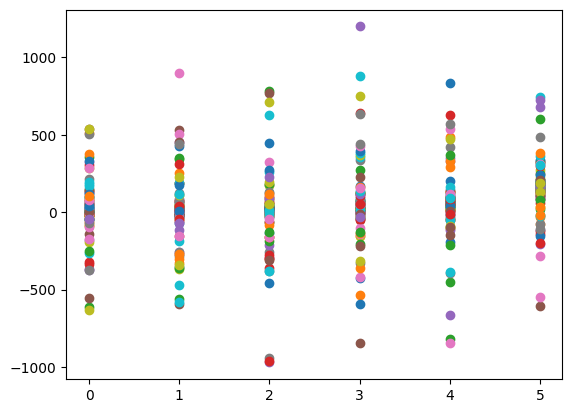

In [35]:


# Assuming the existence of data_gen, model, sse2, hessian_numerical functions as mentioned

noise_levels = [0.1, 0.2, 0.5, 0.6, 0.7, 0.8, 1, 1.2, 1.5, 2, 3, 4, 10, 20, 30, 40, 70, 100, 200, 300, 400, 500]
#noise_levels = [0.1]
num_datapoints = 6
x0, b = sp.symbols('x0 b')

for level in noise_levels:
    num_minimas = 0
    for _ in range(10):  # Repeat experiment to get average number of minima
        data = data_gen(num_datapoints, level, 1, 1)
        x_i = np.array(list(data['Data'].values))
        t_i = np.array(list(data['Time'].values))
        plt.scatter(t_i, x_i)
        
        B = groeb(x_i, t_i)
        
                        
        positive_roots_b = roots_symbolic(B[1])
        
        params = find_x0_alpha_pairs(B, positive_roots_b)
        maxima_checks = evaluate_hessian_at_extremas(params, x_i, t_i)

        num_minimas += sum(1 for _, is_true in maxima_checks if is_true)

                
    print(f'Average number of minima for noise={level}: {num_minimas / 10}')

In [ ]:
#Investigating the landscape of these cases where we have several minimas. 


[(-1.58985675449688e-16, -4.348174044490686), (-5.6843418860808e-14, -0.1840769085685173), (202.523127350503, -0.6578922789468824), (-11.7717744026413, 0.8426678220342249)]
number of minimas:
2


,Time,Data
0,0,-569/100
1,1,43021/100
2,2,3841/5
3,3,-5599/10
4,4,-59707/100
5,5,-69171/100


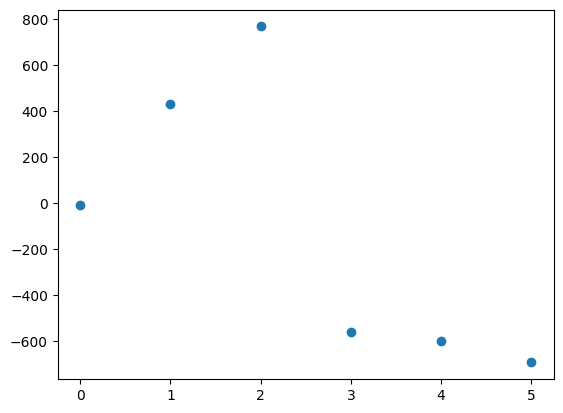

In [52]:


noise = 10
num_datapoints = 6
x0, b = sp.symbols('x0 b')
s = 1
data = 0
while s < 2:
    data = data_gen(num_datapoints, level, 1, 1)
    x_i = np.array(list(data['Data'].values))
    t_i = np.array(list(data['Time'].values))
        
    B = groeb(x_i, t_i)
        
                        
    positive_roots_b = roots_symbolic(B[1])
        
    params = find_x0_alpha_pairs(B, positive_roots_b)

    maxima_checks = evaluate_hessian_at_extremas(params, x_i, t_i)

    s = sum(1 for _, is_true in maxima_checks if is_true)
plt.scatter(t_i, x_i)
print(params)
print("number of minimas:")
print(s)
data
                

In [58]:
# Parameters (x0, alpha phormat)

parameters_2_minimas = [(-1.58985675449688e-16, -4.348174044490686), 
                        (-5.6843418860808e-14, -0.1840769085685173), 
                        (202.523127350503, -0.6578922789468824), 
                        (-11.7717744026413, 0.8426678220342249)]

 #We plot this landscape
maxima_checks

[((-1.58985675449688e-16, -4.348174044490686), False),
 ((-5.6843418860808e-14, -0.1840769085685173), False),
 ((202.523127350503, -0.6578922789468824), True),
 ((-11.7717744026413, 0.8426678220342249), True)]

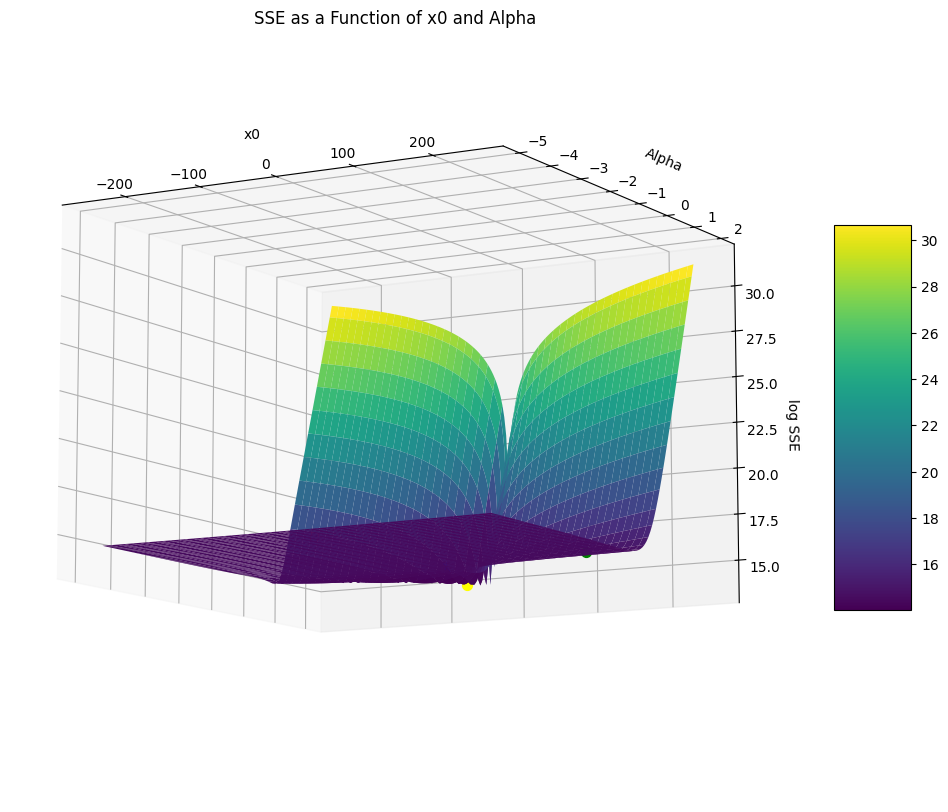

In [78]:
# Define the range for alpha and x0
alpha_range = np.linspace(-5, 2, 100)  # Adjust the range as needed
x0_range = np.linspace(-250, 250, 200)  # Adjust the range as needed


# Generate a meshgrid for x0 and alpha ranges
X0, Alpha = np.meshgrid(x0_range, alpha_range)


# Initialize an array to store SSE values
SSE_values = np.zeros(X0.shape)


# Compute SSE for each combination of x0 and alpha
for i in range(len(alpha_range)):
    for j in range(len(x0_range)):
        params = (X0[i, j], Alpha[i, j])
        SSE_values[i, j] = sse(params, data)

        
# Creating the plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')


# Surface plot with log scale (since data is exponential)
surf = ax.plot_surface(X0, Alpha, np.log(SSE_values), cmap='viridis', edgecolor='none')


# Labels and title
ax.set_xlabel('x0')
ax.set_ylabel('Alpha')
ax.set_zlabel('log SSE')
ax.set_title('SSE as a Function of x0 and Alpha')


p1 = parameters_2_minimas[0]
p2 = parameters_2_minimas[1]
p3 = parameters_2_minimas[2]
p4 = parameters_2_minimas[3]


# Corrected Points to include the SSE values for proper 3D plotting
# Calculate the SSE for each point or get it from your previous calculations
p1_sse = np.log(float(sse(p1, data)))
p2_sse = np.log(float(sse(p2, data)))
p3_sse = np.log(float(sse(p3, data)))
p4_sse = np.log(float(sse(p4, data)))

# Plot points on the surface. Z value needs to be the logged SSE for each point
ax.scatter(p1[0], p1[1], p1_sse, color='red', s=50, label='Point 1')  # s is the size of the point
ax.scatter(p2[0], p2[1], p2_sse, color='blue', s=50, label='Point 2')
ax.scatter(p3[0], p3[1], p3_sse, color='green', s=50, label='minim')
ax.scatter(p4[0], p4[1], p4_sse, color='yellow', s=50, label='Minima')


# Colorbar to show the SSE scale better/clearer
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.view_init(elev=-10, azim=-60)

# Show the plot with the adjusted view
plt.show()


In [1]:
#The double exponential case

x_i = [1, 20, 400, 4000,2, 4, 16]
t_i = [0, 1, 2, 3, 4, 5, 6]
plt.scatter(t_i, x_i)
        
B = groeb(x_i, t_i)
        
                        
positive_roots_b = roots_symbolic(B[1])
        
params = find_x0_alpha_pairs(B, positive_roots_b)

maxima_checks = evaluate_hessian_at_extremas(params, x_i, t_i)


s = sum(1 for _, is_true in maxima_checks if is_true)
plt.scatter(t_i, x_i)
print(params)
print("number of minimas:")
print(s)

NameError: name 'plt' is not defined

In [ ]:
# How number of minimas change with number of datapoints.
# Removing some datapoints. (non uniform spacing)

In [23]:
print('noise vs number of minimas ')
noise = [0, 5, 10, 20, 30, 50, 70, 100, 200, 500, 1000]
num_datapoints = 6
x0, b = sp.symbols('x0 b')
s = 1
data = 0
for level in noise:
    trials = []
    for _ in range(10): 
        data = data_gen(num_datapoints, level, 1, 1)
        x_i = np.array(list(data['Data'].values))
        t_i = np.array(list(data['Time'].values))
            
        B = groeb(x_i, t_i)
            
                            
        positive_roots_b = roots_symbolic(B[1])
            
        params = find_x0_alpha_pairs(B, positive_roots_b)
    
        maxima_checks = evaluate_hessian_at_extremas(params, x_i, t_i)
    
        s = sum(1 for _, is_true in maxima_checks if is_true)
        trials.append(s)
    print(sum(trials)/len(trials))

print("Done")

noise vs number of minimas 
1.0
1.1
1.1
1.3
1.2
1.3
1.1
1.1
1.1
0.9
1.2
Done


In [26]:
print('number of datapoints vs number of minimas ')
noise = 10
num_datapoints = [3,4,5,6,7]
x0, b = sp.symbols('x0 b')
s = 1
data = 0
for num in num_datapoints:
    trials = []
    for _ in range(10): 
        data = data_gen(num, noise, 1, 1)
        x_i = np.array(list(data['Data'].values))
        t_i = np.array(list(data['Time'].values))
            
        B = groeb(x_i, t_i)
            
                            
        positive_roots_b = roots_symbolic(B[1])
            
        params = find_x0_alpha_pairs(B, positive_roots_b)
    
        maxima_checks = evaluate_hessian_at_extremas(params, x_i, t_i)
    
        s = sum(1 for _, is_true in maxima_checks if is_true)
        trials.append(s)
    print(sum(trials)/len(trials))




number of datapoints vs number of minimas 
0.4
1.0
0.9
1.5
1.2


In [28]:
print('looking for interesting minimas landscape')

noise = 10
num_datapoints = 6
x0, b = sp.symbols('x0 b')
s = 1
data = 0
while True:
    s = 1
    while s < 2:
        data = data_gen(num_datapoints, level, 1, 1)
        x_i = np.array(list(data['Data'].values))
        t_i = np.array(list(data['Time'].values))
            
        B = groeb(x_i, t_i)
            
                            
        positive_roots_b = roots_symbolic(B[1])
            
        params = find_x0_alpha_pairs(B, positive_roots_b)
    
        maxima_checks = evaluate_hessian_at_extremas(params, x_i, t_i)
    
        s = sum(1 for _, is_true in maxima_checks if is_true)
   # plt.scatter(t_i, x_i)
    print(params)
    print("number of minimas:")
    print(s)
    data
                    

looking for interesting minimas landscape
[(3.73034936274053e-14, -0.7647195287443425), (-349.321811836644, -4.184719652150101), (177.018080388408, 0.40734072251880493)]
number of minimas:
2
[(3.63797880709171e-12, 0.22162655708962448), (-1327.63681018457, -0.7998610327082487), (0.046875, 1.8838742128696102)]
number of minimas:
2
[(774.496381334732, -1.2746256468222652), (726.081414847598, -0.8436847318224262), (199.543640551178, 0.22925694686229775)]
number of minimas:
2
[(0.0, 0.17529677051927856), (4.05687023885548e-05, 1.444543543891816), (1386.2591335135, -0.6211508004282876), (-22.7766731414795, 0.5841980456960327)]
number of minimas:
2
[(-1.36424205265939e-12, 0.4150781162475166), (-1718.73299491931, -0.4316001115770265), (1.09915129640922, 1.2667019363647045)]
number of minimas:
2
[(-8.99280649946377e-15, -1.1878201735848417), (-2.62900812231237e-13, -0.5649646879321197), (-34.2249942658561, -0.8018618314228856), (75.6068773037769, 0.5113655142430966)]
number of minimas:
2
[(1.

KeyboardInterrupt: 

In [33]:
print('looking for interesting minimas landscape')

noise = 10
num_datapoints = 6
x0, b = sp.symbols('x0 b')
s = 1
data = 0
while True:
    s = 1
    while s < 2:
        data = data_gen(num_datapoints, level, 1, 1)
        x_i = np.array(list(data['Data'].values))
        t_i = np.array(list(data['Time'].values))
            
        B = groeb(x_i, t_i)
            
                            
        positive_roots_b = roots_symbolic(B[1])
            
        params = find_x0_alpha_pairs(B, positive_roots_b)
    
        maxima_checks = evaluate_hessian_at_extremas(params, x_i, t_i)
    
        s = sum(1 for _, is_true in maxima_checks if is_true)
        ret = [maxima for maxima, is_true in maxima_checks if is_true]
   # plt.scatter(t_i, x_i)
    print(params)
    print(s)
    print(ret)
                    

looking for interesting minimas landscape
[(1.81898940354586e-12, 0.20808992169262377), (-1711.46584538845, -1.033038945173737), (3.92561198771, 1.013142065841628)]
2
[(-1711.46584538845, -1.033038945173737), (3.92561198771, 1.013142065841628)]
[(-2.27373675443232e-13, -0.12206696916480883), (-6.03540684096515e-09, 0.8459839298341222), (571.354689675013, -1.0011762047268233), (-58.0396180684966, 0.26424118126888324)]
2
[(571.354689675013, -1.0011762047268233), (-58.0396180684966, 0.26424118126888324)]
[(-6.30606677987089e-14, -1.2683210171684454), (-2.45563569478691e-11, 0.47700364154293856), (683.993096784843, -0.18405247565281976), (-0.263750042882748, 1.5273673340605243)]
2
[(683.993096784843, -0.18405247565281976), (-0.263750042882748, 1.5273673340605243)]
[(-1.13686837721616e-13, 0.007131036446941593), (1126.25500296863, -1.3197991559350164), (-11.9117028446926, 0.7863678010679002), (-0.259776465594769, 1.5648891145032127)]
2
[(1126.25500296863, -1.3197991559350164), (-11.91170284

KeyboardInterrupt: 

In [37]:
f = ['x^2*y^2 + 2*x - 1;', 'x^2*y^2 - 3*y + 1;']
sols = phcpy.solver.solve(f)
for sol in sols: print(sol)

TypeError: 'NoneType' object is not callable

In [35]:
import phcpy

# Your given variables and data points
x0, b = sp.symbols('x0 b')
x_i = [1, 20, 400]
t_i = [0, 1, 2]

# SSE and its partials
SSE_poly = sum([(x - x0 * b**t)**2 for x, t in zip(x_i, t_i)])
partial_x0 = sp.diff(SSE_poly, x0)
partial_b = sp.diff(SSE_poly, b)

# Convert symbolic expressions to strings
partial_x0_str = str(partial_x0)
partial_b_str = str(partial_b)

# Replace ** with ^ for phcpy
#partial_x0_str = partial_x0_str.replace('**', '^')
#partial_b_str = partial_b_str.replace('**', '^')

print(partial_x0_str)
print(partial_b_str)
# Formulate the system for phcpy
system = [f'{partial_x0_str};', f'{partial_b_str};']

solutions = phcpy.solver.solve(system)

# Print solutions
for solution in solutions:
    print(solution)


-2*b**2*(-b**2*x0 + 400) - 2*b*(-b*x0 + 20) + 2*x0 - 2
-4*b*x0*(-b**2*x0 + 400) - 2*x0*(-b*x0 + 20)


TypeError: 'NoneType' object is not callable

[((1.00211273669265, 0.9995410546254724), True)]
[((1.00175725668669, 0.9995054159139556), True)]
[((0.994817662343848, 1.0010006060203898), True)]
[((0.996571941766888, 1.0006453692779362), True)]
[((0.997576505265897, 1.0003867185727444), True)]
[((1.01485192682594, 0.9971132142695084), True)]
[((1.00485421949998, 0.9988833347603125), True)]
[((1.0044277482084, 0.9988923028112818), True)]
[((1.01197914138902, 0.9975258377571773), True)]
[((1.00390860854532, 0.9992057394875246), True)]


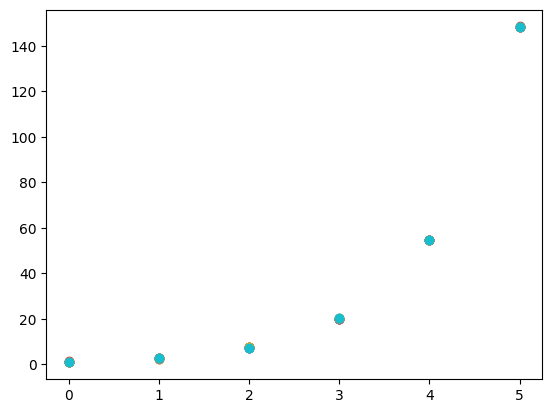

In [26]:
# Assuming placeholder functions are correctly defined above

noise_levels = [0.1]
num_datapoints = 6

for level in noise_levels:
    num_minimas = 0
    for _ in range(10):
        data = data_gen(num_datapoints, level, 1, 1)
        x_i = np.array(list(data['Data'].values))
        t_i = np.array(list(data['Time'].values))
        plt.scatter(t_i, x_i)
        
        B = groeb(x_i, t_i)
        
        positive_roots_b = roots_symbolic(B[1])
        
        params = find_x0_alpha_pairs(B, positive_roots_b)
        maxima_checks = evaluate_hessian_at_extremas(params, x_i, t_i)
        print(maxima_checks)


In [ ]:
# Testing number of positive roots for different NUMBER OF DATAPOINTS
# All else constant

initial_value = 1
growth_rate = 2
noise = 2

x, t = generate_almost_exponential_data(50, initial_value, growth_rate, noise)


for n in range(4, 100, 2):
    #tmp = []
    #for i in range(10):
    
    x_i, t_i = x[:n], t[:n]
        # Construct the SSE polynomial
    SSE_poly = sum([(x - x0 * b**t)**2 for x, t in zip(x_i, t_i)])
    
        # Compute the partial derivatives with respect to x0 and beta
    partial_x0 = sp.diff(SSE_poly, x0)
    partial_b = sp.diff(SSE_poly, b)
    
        # Compute the Groebner basis for the system of equations given by the partial derivatives
    B = sp.groebner([partial_x0, partial_b], x0, b, order='lex')

    num_positive_roots = count_positive_roots(B[1])

     #   tmp.append(num_positive_roots)
    
    print(f'Number of positive roots for number of points={n}: {num_positive_roots}')





In [ ]:
# Removing datapoints, seeing how that affects number of minimas.

def remove_random_pairs(arr1, arr2):
    n = len(arr1)
    if n == 0:
        return 
    
    # Generate a random index. Since Python is 0-indexed, we adjust by -1.
    n = random.randint(1, n) - 1
    
    # Remove the nth element from both arrays
    del arr1[n]
    del arr2[n]
    
    return arr1, arr2




# Defining parameters
num_datapoints = 10
initial_value = 1
growth_rate = 2
nosie = 2

#Generate Data
x_i, t_i = generate_almost_exponential_data(num_datapoints, initial_value, growth_rate, noise)
    
for n in range(6):
    SSE_poly = sum([(x - x0 * b**t)**2 for x, t in zip(x_i, t_i)])
    # Compute the partial derivatives with respect to x0 and beta
    partial_x0 = sp.diff(SSE_poly, x0)
    partial_b = sp.diff(SSE_poly, b)
    # Compute the Groebner basis for the system of equations given by the partial derivatives
    B = sp.groebner([partial_x0, partial_b], x0, b, order='lex')

    num_positive_roots = count_positive_roots(B[1])
    print(x_i)
    print(t_i)
    print(num_positive_roots)
    x_i, t_i = remove_random_pairs(x_i, t_i)






In [ ]:
#Checking the number of positive roots (Graphically )

# Define your polynomial function
def poly_func(b):
    return b**18 + 7774373658036*b**17/233921806117 - 4553233305389*b**16/467843612234 + 133774330632*b**15/233921806117 - 2776369633727*b**14/467843612234 - 30909466044705*b**13/935687224468 - 492111743306*b**12/233921806117 - 31179962865099*b**11/467843612234 + 404074815072*b**10/233921806117 - 93810391157911*b**9/935687224468 + 1300261466400*b**8/233921806117 - 31273241267480*b**7/233921806117 + 4769587985015*b**6/233921806117 - 888065821209*b**5/935687224468 + 11067417689*b**4/467843612234 - 1475228009*b**3/467843612234 + 75690347*b**2/467843612234 - 287111*b/233921806117 + 8450/233921806117


# Generate x values
x_values = np.linspace(-100, 10, 4000)  # Adjust range and density as needed
y_values = poly_func(x_values)

# Plotting
plt.plot(x_values, y_values, label='Polynomial')
plt.axhline(0, color='red', lw=2)  # X-axis
plt.legend()
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Polynomial Graph')
plt.ylim(-1, 1)
plt.show()